# 布洛赫球

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook.png)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/zh_cn/mindspore_bloch_sphere.ipynb)&emsp;
[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code.png)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/zh_cn/mindspore_bloch_sphere.py)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source.png)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_zh_cn/bloch_sphere.ipynb)

## 单比特量子态

与经典比特不一样的是，量子比特可以同时处于计算基矢 $\left|0\right>$ 态和 $\left|1\right>$态上，通常表示为：

$$\left|\psi\right> = a\left|0\right> + b\left|1\right>$$

这里，$a$和$b$是复数。由于量子态的归一性条件 $\left<\psi\middle|\psi\right> = 1$，因此，我们有：

$$\left|a\right|^2 + \left|b\right|^2 = 1$$

对于二维希尔伯特空间，我们可以将计算基矢做如下的映射，

$$
\left|0\right> =
    \begin{pmatrix}
    1 \\
    0
    \end{pmatrix},
\left|1\right> =
    \begin{pmatrix}
    0 \\
    1
    \end{pmatrix}
$$

因此，任意单比特量子态可表述为：

$$\left|\psi\right> =
    \begin{pmatrix}
    a \\
    b
    \end{pmatrix}
$$

在一般情况，我们并不关心全局相位，因此，我们可以假设 $a=\cos\left(\theta/2\right), b=e^{i\phi}\sin\left(\theta/2\right)$：

$$\left|\psi\right> = \cos\left(\theta/2\right) \left|0\right> + e^{i\phi}\sin\left(\theta/2\right)\left|1\right>$$

这里，我们不妨在单位球中来表示该任意量子态，如下图，将 $\theta$ 和 $\phi$ 分别取为仰角和方位角。

![bloch-sphere](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_zh_cn/images/bloch_sphere.png)

下面，我们将展示怎么在MindQuantum中展示一个单比特量子态，并且以动画的形式展示单比特量子态的演化。

## 导入相关模块

In [9]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import RX, RZ
from mindquantum.io.display import BlochScene

为了在Jupyter Notebook中动态展示量子态，我们需要运行如下指令：

In [10]:
%matplotlib ipympl

## 搭建量子线路

由上面bloch球可知，我们可以通过旋转门 `RX` 来控制仰角 $\theta$，通过 `RZ` 来控制方位角 $\phi$。因此，我们可以搭建如下量子线路：

In [11]:
circ = Circuit()               # 搭建制备任意单比特量子态的线路
circ += RX('theta').on(0)      # 通过RX门控制仰角
circ += RZ('phi').on(0)        # 通过RZ门控制方位角
circ.svg()

这里我们不妨取 $\theta=\pi/4, \phi=\pi/4$，并计算出该位置的量子态。

In [12]:
import numpy as np

state1 = circ.get_qs(pr={'theta': np.pi/4, 'phi': np.pi/4})
print(state1)

[0.85355339-0.35355339j 0.14644661-0.35355339j]


## 展示量子态

在MindQuantum中，`BlochScene`是用来展示布洛赫球的模块，我们可以在`BlochScene`中添加任意多的单比特量子态，并且还可以动画展示单比特量子态的演化。

<IPython.core.display.Javascript object>


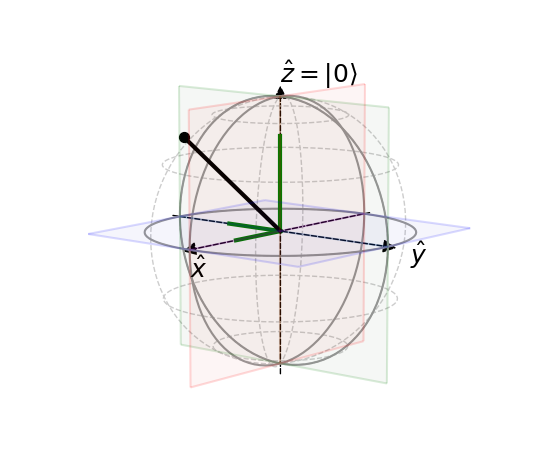

In [13]:
scene = BlochScene()                       # 创建布洛赫绘图场景
fig, ax = scene.create_scene()             # 初始化场景
state_obj1 = scene.add_state(ax, state1)   # 往场景中添加一个量子态

此外，我们还可以以深色模式来展示布洛赫球，如下。

<IPython.core.display.Javascript object>


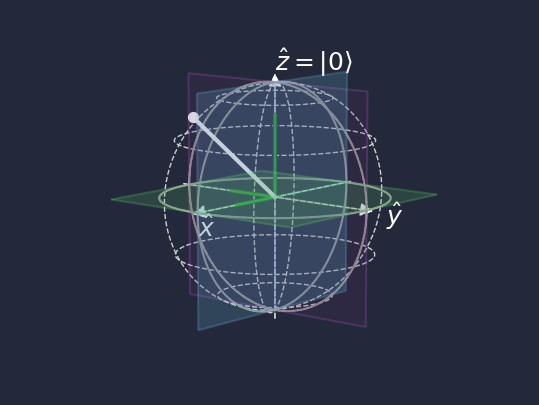

In [14]:
scene = BlochScene('dark')                       # 创建布洛赫绘图场景
fig, ax = scene.create_scene()                   # 初始化场景
state_obj1 = scene.add_state(ax, state1)         # 往场景中添加一个量子态

## 展示量子态演化

当该量子态是一个含时演化的量子态时，我们还可以在布洛赫场景中创建动画。这里我们不妨假设仰角 $\theta$ 和方位角 $\phi$ 是含时的，我们求出所有时间内的量子态。

In [20]:
t = np.linspace(0, 10, 500)
all_theta = 4 * np.sin(2 * t)
all_phi = 5 * np.cos(3 * t)
states = []
for theta, phi in zip(all_theta, all_phi):
    states.append(circ.get_qs(pr={'theta': theta, 'phi': phi}))
states = np.array(states)

下面，我们创建一个深色的布洛赫场景，并用所演化出来的量子态的第一个量子态来初始化场景。

<IPython.core.display.Javascript object>


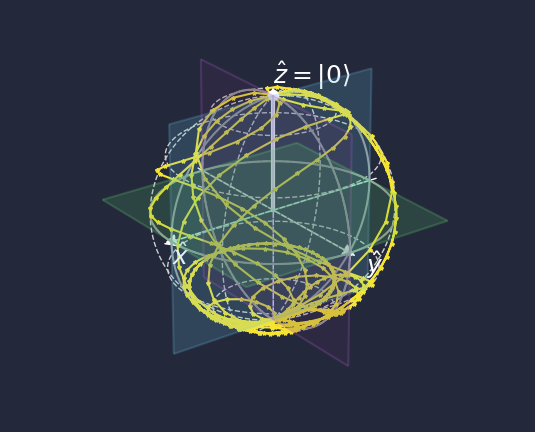

In [22]:
scene = BlochScene('dark')                          # 创建布洛赫绘图场景
fig, ax = scene.create_scene()                      # 初始化场景
state_obj = scene.add_state(ax, states[0])          # 往场景中添加一个量子态

为了能够动态展示量子态的演化，我们从布洛赫场景中创建一个动画对象。

In [23]:
anim = scene.animation(fig, ax, state_obj, states)

![bloch-sphere-anim](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_zh_cn/images/bloch_sphere.gif)

由此，我们可以看到单比特的量子态在布洛赫球中已经动起来了。

